In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf

np.random.seed(5)

In [2]:
x_data = np.linspace(-1,1,100)
y_data = 2*x_data + 1.0 +np.random.randn(*x_data.shape)*0.4

In [3]:
x = tf.placeholder("float",name = "x")#定义训练数据占位符，x是特征值，y是标签值
y = tf.placeholder("float",name = "y")

In [4]:
w = tf.Variable(1.0, name = "w0")#构建参数
b = tf.Variable(0.0, name = "b0")

In [5]:
def model(x,w,b):#构建模型
    return tf.multiply(x, w) + b

In [6]:
pred = model(x, w, b)

In [7]:
train_epochs = 5
learning_rate = 0.05

loss_function = tf.reduce_mean(tf.square(y-pred))

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)
#梯度下降优化器

In [9]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [15]:
step = 0#训练步数
loss_list = []#保存loss值的列表
display_step = 50#报告的粒度，每训练50个样本输出一次loss

Train Epoch: 01 Step:600 loss= 0.027518081
Train Epoch: 01 Step:650 loss= 0.048337195
Train Epoch: 02 Step:700 loss= 0.027518081
Train Epoch: 02 Step:750 loss= 0.048337195
Train Epoch: 03 Step:800 loss= 0.027518081
Train Epoch: 03 Step:850 loss= 0.048337195
Train Epoch: 04 Step:900 loss= 0.027518081
Train Epoch: 04 Step:950 loss= 0.048337195
Train Epoch: 05 Step:1000 loss= 0.027518081
Train Epoch: 05 Step:1050 loss= 0.048337195


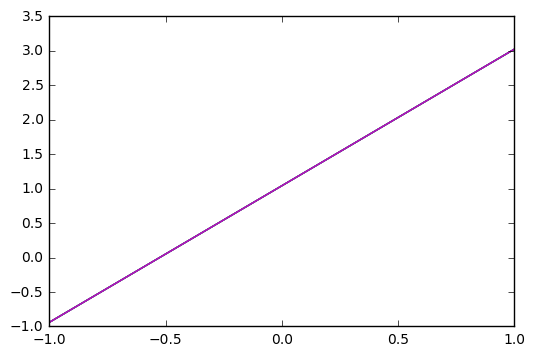

In [18]:
#SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs,ys in zip(x_data,y_data):
        _, loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        
        #显示loss
        loss_list.append(loss)
        step=step+1
        if step % display_step == 0:
            print("Train Epoch:", '%02d' % (epoch+1), "Step:%03d" % (step), "loss=","{:.9f}".format(loss))
    b0tmp = b.eval(session=sess)
    w0tmp = w.eval(session=sess)
    plt.plot(x_data ,w0tmp * x_data + b0tmp)

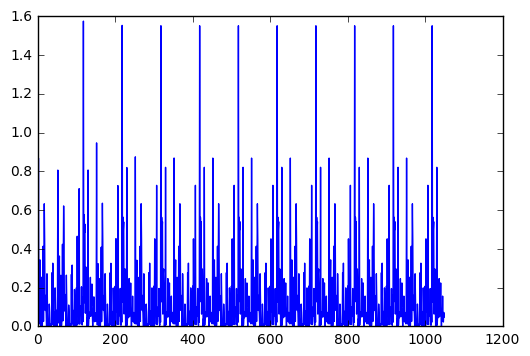

In [19]:
plt.plot(loss_list)#loss值变化图

In [12]:
print("w:",sess.run(w))
print("b:",sess.run(b))

w: 1.98225
b: 1.04205


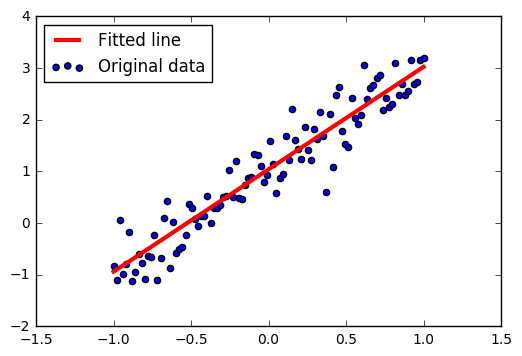

In [13]:
plt.scatter(x_data,y_data,label = 'Original data')
plt.plot(x_data,x_data*sess.run(w) + sess.run(b),label = 'Fitted line',color ='r', linewidth = 3)
plt.legend(loc=2)

In [22]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x:x_test})
print("预测值：%f"%predict)

target = 2*x_test+1.0
print("目标值：%f"%target)

预测值：7.405184
目标值：7.420000
